In [19]:
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END
from typing import TypedDict,Annotated
import operator
from dotenv import load_dotenv
from pydantic import BaseModel,Field
load_dotenv()

True

In [20]:
class EvalSchema(BaseModel):
    random_number : int = Field(description="A random generated number between 10 and 100",ge=10,le=100)

In [21]:
model=ChatOpenAI(model="gpt-4o-mini")
struct_model=model.with_structured_output(EvalSchema)

In [22]:
class randomState(TypedDict):
    first_random_number: int
    second_random_number: int
    third_random_number: int
    random_number_list: Annotated[list[int],operator.add]
    average : int

In [ ]:
def first_number(state:randomState):
    prompt="Generate a random integer between 10 and 30"
    response=struct_model.invoke(prompt).random_number
    return {"first_random_number":response, "random_number_list":[response]}

def second_number(state:randomState):
    prompt="Generate a random integer between 40 and 70"
    response=struct_model.invoke(prompt).random_number
    return {"second_random_number":response, "random_number_list":[response]}


def third_number(state:randomState):
    prompt="Generate a random integer between 80 and 100"
    response=struct_model.invoke(prompt).random_number
    return {"third_random_number":response, "random_number_list":[response]}


def average_numbers(state:randomState):
    avg=sum(state.random_number_list)/3
    return {"average":avg}

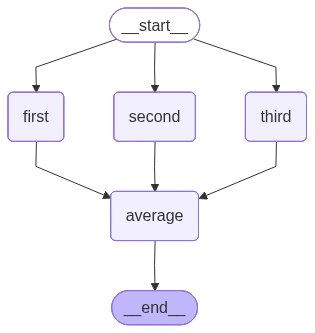

In [24]:
graph=StateGraph(randomState)

graph.add_node("first",first_number)
graph.add_node("second",second_number)
graph.add_node("third",third_number)
graph.add_node("average",average_numbers)

graph.add_edge(START,"first")
graph.add_edge(START,"second")
graph.add_edge(START,"third")

graph.add_edge("first","average")
graph.add_edge("second","average")
graph.add_edge("third","average")

graph.add_edge("average",END)
graph.compile()







In [25]:
workflow=graph.compile()
initial_state={
    "first_random_number": None,
    "second_random_number": None,
    "third_random_number": None,
    "random_number_list" :[],
    "average" :None
    }
final_state=workflow.invoke(initial_state)

TypeError: RunnableSequence.invoke() missing 1 required positional argument: 'input'